In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [54]:
inspector = inspect(engine)

In [55]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [56]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [68]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [58]:
import datetime as dt

In [59]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [128]:
prcp =[Measurement.date,
               Measurement.prcp]

In [130]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
#group_by(func.strftime("%m", Measurement.date)).
# Calculate the date one year from the last date in data set.
date_filter='2016-08-22'
data_prcp=session.query(*prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > date_filter).all()
# Perform a query to retrieve the data and precipitation scores
data_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [137]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(data_prcp[:], columns=['date', 'precipitation'])
df.set_index('date', inplace=True )
df.sort_values(by=['date'])
df

precipitation
date                     
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
...                   ...
2017-08-19           0.09
2017-08-20            NaN
2017-08-21           0.56
2017-08-22           0.50
2017-08-23           0.45

[2230 rows x 1 columns]

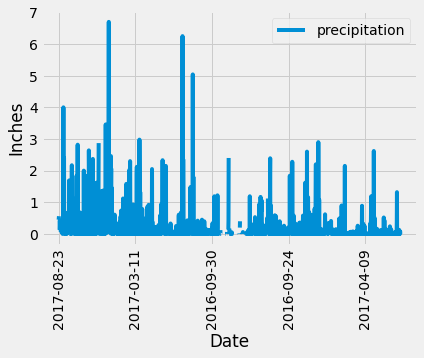

In [143]:
# Use Pandas Plotting with Matplotlib to plot the data
df.iloc[::-1].plot()
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [146]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.groupby(["date"])["precipitation"].agg(['mean','median', 'std','sem'])

mean  median       std       sem
date                                            
2016-08-23  0.451667   0.100  0.706468  0.288414
2016-08-24  1.555000   1.800  0.840541  0.343150
2016-08-25  0.077143   0.080  0.071813  0.027143
2016-08-26  0.016667   0.015  0.016330  0.006667
2016-08-27  0.064000   0.020  0.081731  0.036551
...              ...     ...       ...       ...
2017-08-19  0.030000   0.000  0.051962  0.030000
2017-08-20  0.005000   0.005  0.007071  0.005000
2017-08-21  0.193333   0.020  0.317700  0.183424
2017-08-22  0.166667   0.000  0.288675  0.166667
2017-08-23  0.132500   0.040  0.215000  0.107500

[366 rows x 4 columns]

# Exploratory Station Analysis

In [152]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).group_by(Station.station).count()

9

In [162]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station)).all()

OperationalError: (sqlite3.OperationalError) no such column: USC00519397
[SQL: SELECT USC00519397, count(?) AS count_1 GROUP BY USC00519397 ORDER BY count(?)]
[parameters: ('USC00519397', 'USC00519397')]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [156]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()